In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from test_model import make_sin_data, LnLikelihood, LnPrior
from impulse.base import TestSampler

import matplotlib.pyplot as plt

import corner

In [5]:
x, data, omega_real, a_real, phi_real = make_sin_data(1000)

In [6]:
lnlike = LnLikelihood(x, data)
lnprior = LnPrior([0, 0, 0], [3, 5, np.pi])

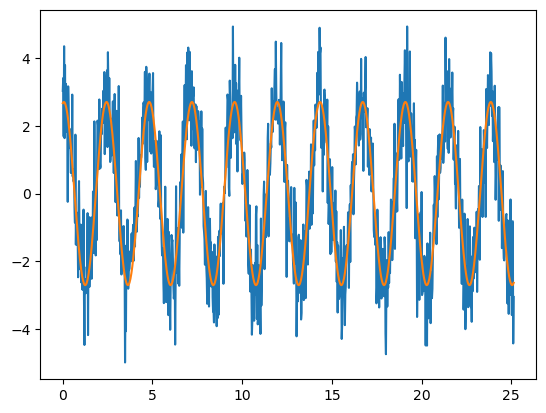

In [7]:
plt.plot(x, data)
plt.plot(x, a_real * np.sin(omega_real*x + phi_real))

In [8]:
sampler = TestSampler(3, lnlike, lnprior, cov_update=100)

In [9]:
sampler.sample(np.array([2, 3, 1]), 100_000, thin=1)

100%|██████████| 99999/99999 [00:10<00:00, 9115.58it/s]


In [10]:
from emcee.autocorr import integrated_time

In [11]:
with open('./chains/chain_1.txt', 'r') as f:
    chain = np.loadtxt(f)

In [17]:
integrated_time(chain[20_000:, 1])

array([15.57956641])

In [13]:
print(omega_real, a_real, phi_real)

2.6403390140235583 2.7013197278011236 1.4112718948795342


(-1.0, 1.0)

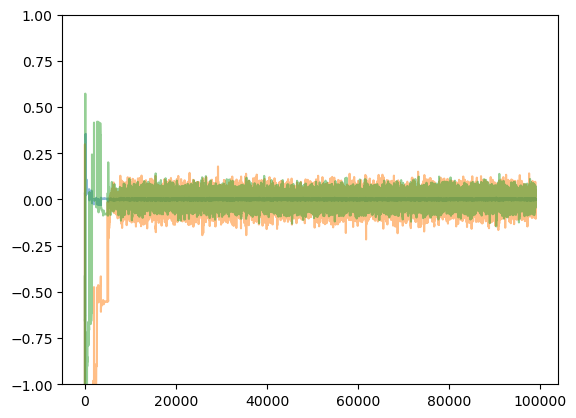

In [14]:
plt.plot(chain[:, 0] - omega_real, alpha = 0.5)
plt.plot(chain[:, 1] - a_real, alpha = 0.5)
plt.plot(chain[:, 2] - phi_real, alpha = 0.5)
plt.ylim([-1, 1])

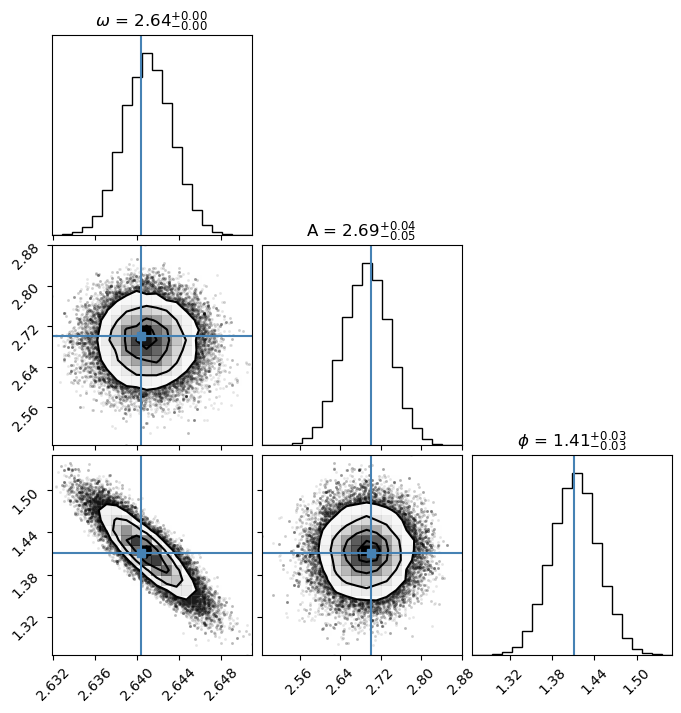

In [15]:
burn = 20_000

corner.corner(chain[burn::1, :3], truths=[omega_real, a_real, phi_real],
              titles=[r'$\omega$', r'A', r'$\phi$'], show_titles=True)
plt.show()